In [1]:
# load packages
import numpy as np 
import scipy 
import pandas as pd
import os
import matplotlib.pyplot as plt #import matplotlib as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns #import mat73
import pickle as pkl
from datetime import datetime
import mne
from mne.viz import plot_topomap
from mne.io import RawArray
import numpy.matlib
sns.set_theme() # set the plotting atmosphere

### Import all files that will be sorted and exported into another .mat file

In [2]:
# Main Directory of processed file from MatLab
#MainDir = 'D:\\AttnXV3_analysis\\RCA_F1\\AvgCRFs\\' # set dir
MainDir = 'C:\\plimon\\LTP_analysis\\eegMatFiles\\MAT' # set dir
os.chdir(MainDir) # change old dir, to this dir
d = os.listdir(MainDir) # list files in dir
print(f'Number of Files on hand: {int(len(d))}')
##############################################
FileN = d[10] # choose one                        
file_path1 = os.path.join(MainDir, FileN) # join paths and prep 2 load
print('Current WD:',file_path1) # does path exist ... ?
#print('Does File #1 Exist?',os.path.exists(file_path1)) # yes or no

Number of Files on hand: 50
Current WD: C:\plimon\LTP_analysis\eegMatFiles\MAT\nl-2666_attnL_20231023_1612_RLS.mat


In [3]:
Fnames = np.sort(d)

In [4]:
NumHarms = 4
NumBins = 6
NumHemis = 2
co = 0

GoodDataDims = NumHarms*NumBins*NumHemis
GoodKeyDicts = NumHarms*NumHemis

In [5]:
SignalData  = {}

for suIn in range(len(d)):#range(10):#
### import file path 
    FileN = Fnames[suIn] # import from sorted subj expt name list                       
    file_path = os.path.join(MainDir, FileN) # join paths and prep 2 load
    mat_data = scipy.io.loadmat(file_path) # import data file
    # extract from file 
    MainData = mat_data['signalData'][co][0]
    HarmInd = np.ravel(mat_data['info'][0][0][0][co][0])
    BinInd = np.ravel(mat_data['info'][0][0][1][co][0])
    SortIters , misc = np.unique(HarmInd, return_counts = True)
    sIters = int(len(SortIters))
### info for indexing and sorting 
    NumHarms,NumHarmCount = np.unique(HarmInd, return_counts = True)
    BinCountArr,NumBinCount = np.unique(BinInd, return_counts = True)
    SortDataIn = np.array(MainData)
    [NumRows, NumChans, NumTrials] = SortDataIn.shape # get dims of data to use later ..
    real_imag_bound = int((NumRows/2))
    #print(f'Data real-imag bound is at row: #{real_imag_bound}')
    chanInd = np.arange(1,NumChans,1)
    prepost_bound = int(NumTrials/2)
### reshape real and imaginary values and remove 0's with nan's
    dIn = SortDataIn.reshape(real_imag_bound,2,NumChans,NumTrials,order='A')
    dIn[dIn==0]=np.nan
### remove prelude bins from each contrast
    xF_Bins = {}
    for i in range(sIters):
        xF_Bins[i]=dIn[HarmInd==i+1,:,:,:] # array begins at 1 - not 0 
        if int(xF_Bins[i].shape[0])!=(NumBins): # remove prelude / avg contrast activity
            temp=xF_Bins[i][1:,:,:,:] # all data w/o 0th row (not relevant data)
            xF_Bins[i]=temp
### average ral and imaginary data based on pre / post
    data = {}
    for fritters in range(sIters):
        xt_comb = np.zeros((NumBins,2,NumChans)) 
        dIn = xF_Bins[fritters]
        tco = int((dIn.shape[3])/2) # pre post trial cutoff
        inds = np.array(np.arange(0,tco*3,tco)) # trial pre post indcies 
        for bin in range(NumBins):
            for ch in range(NumChans):
                xt_comb[bin,0,ch] = np.hypot(np.nanmean(dIn[bin,0,ch,inds[0]:inds[1]]),np.nanmean(dIn[bin,1,ch,inds[0]:inds[1]])) # pre
                xt_comb[bin,1,ch] = np.hypot(np.nanmean(dIn[bin,0,ch,inds[1]:inds[2]]),np.nanmean(dIn[bin,1,ch,inds[1]:inds[2]])) # post
        data[fritters] = xt_comb
### remove 1F1 data if it is present
    if int(len(data.keys())) != GoodKeyDicts:
        #print(f'f1 data is first key ... now removing')
        del data[0] # rmv 1f1 data
        dOut = {key - 1: value for key, value in data.items()} # reset dict vals to start at 0
        SignalData[suIn] = dOut

        if int(len(data.keys())) == GoodKeyDicts:
            print(f'data file # {suIn} good now!')

    elif int(len(data.keys())) == GoodKeyDicts:
        #print(f'Data file # {suIn} all good, will be stored!')
        SignalData[suIn] = data

data file # 0 good now!


C:\Users\plimon\AppData\Local\Temp\ipykernel_20444\3378134481.py:43: RuntimeWarning: Mean of empty slice
  xt_comb[bin,1,ch] = np.hypot(np.nanmean(dIn[bin,0,ch,inds[1]:inds[2]]),np.nanmean(dIn[bin,1,ch,inds[1]:inds[2]])) # post


data file # 1 good now!
data file # 2 good now!
data file # 3 good now!
data file # 4 good now!
data file # 5 good now!
data file # 6 good now!
data file # 7 good now!
data file # 8 good now!
data file # 9 good now!
data file # 10 good now!
data file # 11 good now!
data file # 12 good now!
data file # 13 good now!
data file # 14 good now!
data file # 15 good now!
data file # 16 good now!
data file # 17 good now!
data file # 18 good now!
data file # 19 good now!
data file # 20 good now!
data file # 21 good now!
data file # 22 good now!
data file # 23 good now!
data file # 24 good now!
data file # 25 good now!
data file # 26 good now!
data file # 27 good now!
data file # 28 good now!
data file # 29 good now!
data file # 30 good now!
data file # 31 good now!
data file # 32 good now!
data file # 33 good now!
data file # 34 good now!
data file # 35 good now!
data file # 44 good now!
data file # 45 good now!
data file # 48 good now!
data file # 49 good now!


dict_keys([0, 1, 2, 3, 4, 5, 6, 7])


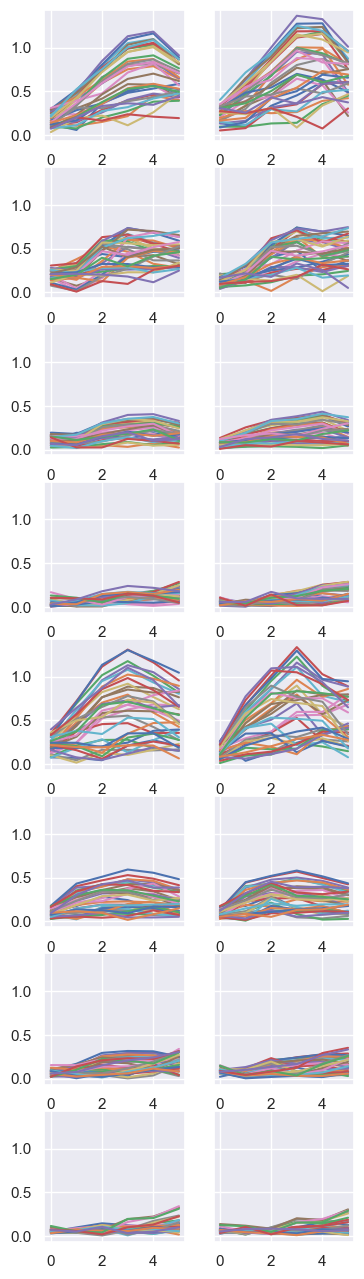

In [7]:
sIn = 25

fig,axs = plt.subplots(8,2, figsize = (4,16), sharey = True)
d2p = SignalData[sIn]
print(d2p.keys())

for i in range(8):
    #print(d2p[i].shape)
    axs[i,0].plot(d2p[i][:,0,55:90])
    axs[i,1].plot(d2p[i][:,1,55:90])


#### Sort Condition Bools

In [8]:
FileNamesIndicies = np.array(d) # make list into array 
FileName = [FileNamesIndicies.replace('_','-') for FileNamesIndicies in FileNamesIndicies] # uniform fnames to make bools for attnl and attnR 

In [9]:
DataOut = {}

DataOut['EEGData'] = SignalData
DataOut['SubIDs'] = FileName

In [10]:
SaveDataDir = 'C:\\plimon\\LTP_analysis\\eegMatFiles\\AllMat'
print(os.path.exists(SaveDataDir)) # does pth exist :p

dnt = datetime.now() # add date and time bc im wreckless when saving ..
fdnt = dnt.strftime("%Y%m%d_%H%M%S") # set the above as a string ...
FileOutName = 'AllSubj_MatFiles_C1'
FileN = f'{FileOutName}_{fdnt}.pkl' 
NewFileNPath = os.path.join(SaveDataDir,FileN)
print('Full New File Dir: ', NewFileNPath)

saveFile = 'y'
if saveFile == 'y':
 with open(NewFileNPath, 'wb') as file:
    pkl.dump(DataOut, file, protocol=pkl.HIGHEST_PROTOCOL)
    print('MAT Data For All Subjs Saved! :))')
else:
    print('Did Not Save File! Change file name before switching to y!')

True
Full New File Dir:  C:\plimon\LTP_analysis\eegMatFiles\AllMat\AllSubj_MatFiles_C1_20240422_162530.pkl
MAT Data For All Subjs Saved! :))


#### Index certain keys for analysis and conditions during expt

In [ ]:
# # find basic data parms 
# MainData = mat_data['signalData']
# noise1 = mat_data['noise1'] # 6 x 1 
# noise2 = mat_data['noise2']
# inds = mat_data['info'][0][0]
# ExpConds = int(MainData.shape[0])
# print(f'Data file contains data for {ExpConds} different conditions')

In [ ]:
# elec_Arc1_outer = [68,64,58,51,47,42,37,31,    80,87,93,98,97,96,95,94]
# elec_Arc2 = [73,69,65,59,52,53,54,  55,  79,86,92,91,90,89,88]
# elec_Arc3 = [74,70,66,60,61,  78,85,84,83,82,  81]
# elec_Arc4_inner = [71,67,62,77,76,75,     72]
# AllAnalysisChans = np.concatenate([elec_Arc1_outer,elec_Arc2,elec_Arc3,elec_Arc4_inner])
# #AllAnalysisChans = np.concatenate([elec_Arc2,elec_Arc3,elec_Arc4_inner])
# AnalysisChans = np.unique(AllAnalysisChans)
# AnalysisChans_int = np.array(AnalysisChans, dtype = int)
# VisChans = np.sort(AnalysisChans)

#### Make Bool mask for mne topoplots

In [ ]:
# OcciMask = np.zeros((128), dtype = bool) # mask of len nchans
# OcciMask[VisChans] = True # set good chans to true 
# #print(OcciMask)

In [ ]:
# # save signal data
# FreqDataPerCo = {}
# for co in range(ExpConds):
#     #print(MainData[co][0].shape)
#     FreqDataPerCo[co] = MainData[co][0]
# # noise data 1 
# Noise1DataPerCo = {}
# for co in range(ExpConds):
#     #print(noise1[co][0].shape)
#     Noise1DataPerCo[co] = noise1[co][0]
# # noise data 2
# Noise2DataPerCo = {}
# for co in range(ExpConds):
#     #print(noise2[co][0].shape)
#     Noise2DataPerCo[co] = noise2[co][0]

In [ ]:
# co = 0 # pre and post induction ltp
# HarmInd = np.ravel(mat_data['info'][0][0] [0][co][0])
# BinInd = np.ravel(mat_data['info'][0][0] [1][co][0])
# #HarmonLabels = mat_data['info'][0][0][2][co][0]
# AvgAct = mat_data['info'][0][0] [3][co] [0] # returns an array with 6 values ...
# NumCondInd = mat_data['info'][0][0][4][co][0] # bin index, includes preludes
# HemiFieldLabels = mat_data['info'][0][0] [2][co][0] # contains harmonic and hemifield data
# hemiFieldnHarmonicInd = mat_data['info'][0][0] [2][co] [0]
#########IN case some nexted arrays need to be extracted or explored
# co = 0
# ind = 2
# inds = mat_data['info'][0][0] [ind][co] [0] # avoid prelude bind which == 0 actually 
# #print(inds)
# for innerlist in inds:
#     for item in innerlist:
#        print(item)
# HemiBound = int(int(len(HemiFieldLabels))/2)
# print(HemiBound) # index for Fx filter freq